# 📊 기초통계 실습문제 (문제 전용)

이 노트북은 **14_기초통계의이해** 강의안의 내용을 직접 실습하기 위한 연습용 버전입니다.

학습 목표:
- 평균, 중앙값, 최빈값의 개념을 직접 계산해보기
- 분산과 표준편차의 차이를 이해하기
- 도수분포표와 히스토그램을 작성하기
- 표준점수(Z-score)의 의미를 해석하기


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

## 1️⃣ 대푯값 (Mean / Median / Mode)
다음 데이터는 10명의 학생이 하루에 사용하는 스마트폰 시간(시간 단위)입니다.
`data = [2, 3, 3, 4, 4, 5, 7, 7, 7, 8]`

문제 1. 평균(mean)을 계산하세요.
문제 2. 중앙값(median)을 계산하세요.
문제 3. 최빈값(mode)을 계산하세요.
문제 4. 평균, 중앙값, 최빈값의 차이를 해석하세요.

In [3]:
a = pd.DataFrame([2,3,3,4,4,5,7,7,7,8], columns=['표본'])
a

,표본
0,2
1,3
2,3
3,4
4,4
5,5
6,7
7,7
8,7
9,8


In [13]:
# 문제 1~4 답:
# 1.평균
a.mean()

표본    5.0
dtype: float64

In [7]:
# 2.중앙값
a.median()

표본    4.5
dtype: float64

In [8]:
# 3.최빈값
a.mode()

,표본
0,7


4. 평균, 중앙값, 최빈값의 차이를 해석<br>
* 평균은 극단값에 민감한 전체 대표값이고 모든 값의 총합을 값의 개수로 나눈 값, 중앙값은 정렬했을 때 가운데 값으로 극단값 영향이 적고, 최빈값은 가장 자주 나타나는 값으로 분포의 패턴을 보여준다.

## 2️⃣ 기하평균 (Geometric Mean)
문제 5. 다음 4년간의 매출 성장률이 있습니다. `[1.10, 1.05, 0.95, 1.15]`
평균 성장률을 (1) 산술평균과 (2) 기하평균으로 각각 계산하세요.
기하평균은 `scipy.stats.gmean()` 함수를 사용하세요.

In [15]:
b = pd.DataFrame([1.10, 1.05, 0.95, 1.15], columns=['표본'])
b

,표본
0,1.10
1,1.05
2,0.95
3,1.15


In [16]:
# 문제 5 답:
#(1)산술평균
print(b.mean())
print((1.10+1.05+0.95+1.15) / 4)

표본    1.0625
dtype: float64
1.0625


In [17]:
#(2)기하평균
from scipy.stats import gmean    
geometric_mean = gmean(b['표본'])
print("기하평균: ", geometric_mean)

기하평균:  1.0598657487606669


## 3️⃣ 도수분포표와 히스토그램
아래 코드를 실행하여 Titanic 데이터를 불러오세요.
```python
import pandas as pd
df = pd.read_csv("./data/titanic.csv")
```

문제 6. `Age` 컬럼의 결측치를 제거하고 기초 통계를 확인하세요.
문제 7. `Age`를 10개의 구간(bin)으로 나누어 도수분포표를 작성하세요.
문제 8. 위 도수분포를 `bar` 형태로 시각화하세요.
문제 9. 전체 인원 중 20대(20~29세)의 비율을 계산하세요.

In [18]:
import pandas as pd
df = pd.read_csv("./data/Titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
# 문제 6~9 답:
#6.Age컬럼의 결측치를 제거하고 기초 통계를 확인하세요.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [21]:
df['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
#7. Age를 10개의 구간(bin)으로 나누어 도수분포표를 작성하세요.
age = df[['Age']]
age

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [25]:
age.value_counts()

Age      
29.699118    177
24.000000     30
22.000000     27
18.000000     26
19.000000     25
            ... 
53.000000      1
66.000000      1
70.500000      1
74.000000      1
80.000000      1
Name: count, Length: 89, dtype: int64

In [26]:
bins = (0, 10, 20, 30, 40, 50, 60, 70, 80, 90)
labels = ('under10s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s')
age_FDT = pd.cut(age['Age'].values, bins=bins, labels=labels, right=False)
print(age_FDT.value_counts())

under10s     62
10s         102
20s         397
30s         167
40s          89
50s          48
60s          19
70s           6
80s           1
Name: count, dtype: int64


<Axes: >

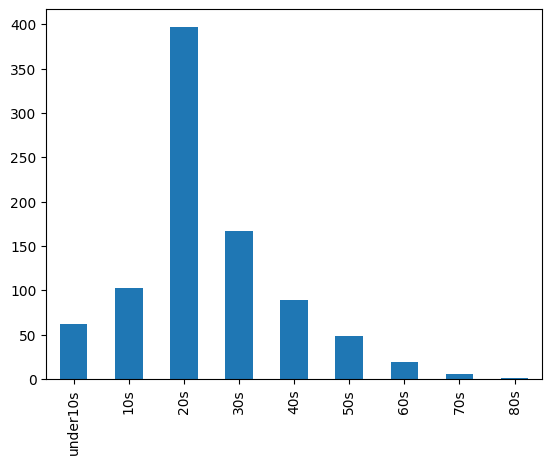

In [27]:
#8. 위 도수분포를 bar 형태로 시각화하세요.
age_FDT.value_counts().plot(kind='bar')

In [ ]:
#9. 전체 인원 중 20대(20~29세)의 비율을 계산하세요.

## 4️⃣ 분산과 표준편차
문제 10. data = [2,3,3,4,4,5,7,7,7,8] 에서 편차(x-평균)을 구하세요.
문제 11. 각 편차를 제곱하여 편차제곱을 구하세요.
문제 12. 분산과 표준편차를 직접 계산하고, `numpy.var()`, `numpy.std()` 결과와 비교하세요.

In [ ]:
# 문제 10~12 답:


## 5️⃣ 표준점수 (Z-score)
문제 13. 다음 시험 점수가 있습니다: `[55, 60, 65, 70, 75, 80, 85, 90, 95, 100]`
문제 14. 평균과 표준편차를 계산하고, 각 점수의 Z-score를 구하세요.
문제 15. Z-score가 1.0 이상인 학생의 비율은 얼마인가요? (Z>1의 의미를 주석으로 설명하세요.)

In [ ]:
# 문제 13~15 답:
